<a href="https://colab.research.google.com/github/R-Owino/MCHEZOPESA-GAMES-RESULT-PREDICTION/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2022_04_Rehema_Owino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question

Predict football results between team 1 and 2, based on who's home and who's away and on whether or not the game is friendly, while displaying the ranks of the teams.

### b) Defining the Metric for Success

The analysis will be considered a success if the accuracy of the prediction is at least 80%.

### c) Understanding the context
Football predictions are done for a couple of reasons, but especially to outperform the predictions of bookmakers who use them to set odds on the outcome of football matches. In this particular prediction problem, we will predict the results of a game based on which team is home, which is away and the type of tournament they are playing i.e friendly, UEFA Champions League, FIFA World Cup








### d) Recording the Experimental Design

- Perform EDA
- Perform any necessary feature engineering 
- Check of multicollinearity
- Build the model
- Cross-validate the model
- Compute RMSE
- Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test




### e) Data Relevance
The data provided, a FIFA result dataset and a ranking dataset, were relevant for the prediction porpose.

## 2. Reading the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split,GridSearchCV
import datetime as dt
print('Necessary libraries imported')

Necessary libraries imported


In [ ]:
# Loading the Dataset
rank = pd.read_csv('/content/fifa_ranking.csv')
result = pd.read_csv('/content/results.csv')

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset

print('There are ' +str(rank.shape[0])+ ' rows and ' +str(rank.shape[1])+ ' columns in the ranks table')
print('There are ' +str(result.shape[0])+ ' rows and ' +str(result.shape[1])+ ' columns in the results table')

There are 57793 rows and 16 columns in the ranks table
There are 40839 rows and 9 columns in the results table


In [ ]:
# Previewing the top of our dataset
rank.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [ ]:
result.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [ ]:
# Previewing the bottom of our dataset
rank.tail(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
result.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# Checking whether each column has an appropriate datatype
print(rank.dtypes)
print('#'*60)
print(result.dtypes)

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
############################################################
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

- For validating the ranks dataset, I will use a list of the world's confederations. 
- For validating the results dataset, I will use a sample list of popular tournaments played.

In [ ]:
# rank dataset

l = ['CONCAF', 'CONMEBOL', 'CAF', 'UEFA', 'AFC', 'OFC']
valid = rank[rank['confederation'].isin(l)]
valid.confederation.unique()

array(['UEFA', 'CONMEBOL', 'CAF', 'AFC', 'OFC'], dtype=object)

In [ ]:
# result dataset

l = ['FA Cup', 'African Cup of Nations', 'UEFA Europa League', 'Copa Libertadores', 'UEFA European Championship', 'UEFA Champions League', 'FIFA World Cup']
valid = result[result['tournament'].isin(l)]
valid.tournament.unique()

array(['FIFA World Cup', 'African Cup of Nations'], dtype=object)

## 5. Tidying the Dataset

In [ ]:
# Since it's results being predicted, I will drop unnecesarry columns from both datasets
rank.drop(['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'last_year_avg','two_year_ago_avg', 'three_year_ago_avg'], axis = 1, inplace = True)

result.drop(['city', 'country'], axis = 1, inplace = True)

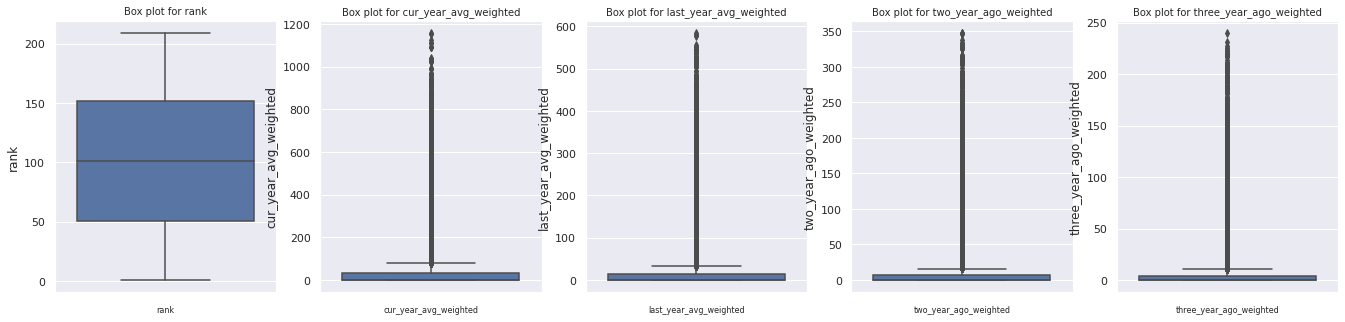

In [ ]:
# Checking for Outliers in the rank dataset

# sns.set(rc={'figure.figsize':(6,6)})
# rank_plot = sns.boxplot(x = rank['rank'])
# plt.show()

col_names = ['rank', 'cur_year_avg_weighted', 'last_year_avg_weighted', 'two_year_ago_weighted', 'three_year_ago_weighted']

def box(columns):
  fig, ax = plt.subplots(ncols = len(columns), figsize=(23,5))

  for i, col_val in enumerate(columns):
      sns.boxplot(y = rank[col_val], ax= ax[i])
      ax[i].set_title('Box plot for {}'.format(col_val), fontsize=10)
      ax[i].set_xlabel(col_val, fontsize= 8)
  return plt.show()   

box(col_names)

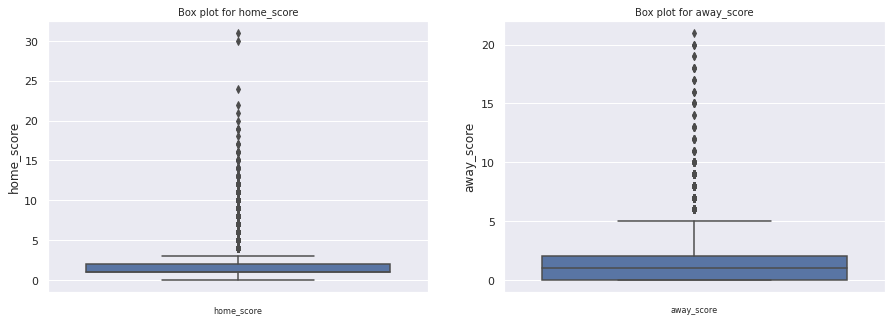

In [ ]:
# Checking for Outliers in the result dataset
col_name = ['home_score', 'away_score']

def box(columns):
  fig, ax = plt.subplots(ncols = len(columns), figsize=(15,5))

  for i, col_val in enumerate(columns):
      sns.boxplot(y = result[col_val], ax= ax[i])
      ax[i].set_title('Box plot for {}'.format(col_val), fontsize=10)
      ax[i].set_xlabel(col_val, fontsize= 8)
  return plt.show()   

box(col_name)

There are outliers in the results dataset, which I'm going to remove for prediction sake.

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out.tail()

In [ ]:
remove_outlier(result, 'home_score')

,date,home_team,away_team,home_score,away_score,tournament,neutral
40830,2019-07-17,Tunisia,Nigeria,0,1,African Cup of Nations,True
40832,2019-07-18,Samoa,Vanuatu,0,11,Pacific Games,False
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,True


In [ ]:
remove_outlier(result, 'away_score')

,date,home_team,away_team,home_score,away_score,tournament,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,True


In [ ]:
# Checking for Anomalies in rank dataset
col_name = ['rank', 'cur_year_avg_weighted', 'last_year_avg_weighted', 'two_year_ago_weighted', 'three_year_ago_weighted']

def quantiles(columns):
  for column in columns:
      Q1 = rank[column].quantile(0.25)
      Q3 = rank[column].quantile(0.75)
      IQR = Q3 - Q1
      lb = Q1 - (1.5 * IQR)
      ub = Q3 + (1.5 * IQR)
      print(f'{column} : \nQ1 = {Q1},Q3 = {Q3}, IQR = {IQR}, lowerbound = {lb}, upperbound = {ub}')

quantiles(col_name)

rank : 
Q1 = 51.0,Q3 = 152.0, IQR = 101.0, lowerbound = -100.5, upperbound = 303.5
cur_year_avg_weighted : 
Q1 = 0.0,Q3 = 32.25, IQR = 32.25, lowerbound = -48.375, upperbound = 80.625
last_year_avg_weighted : 
Q1 = 0.0,Q3 = 13.33, IQR = 13.33, lowerbound = -19.995, upperbound = 33.325
two_year_ago_weighted : 
Q1 = 0.0,Q3 = 6.45, IQR = 6.45, lowerbound = -9.675, upperbound = 16.125
three_year_ago_weighted : 
Q1 = 0.0,Q3 = 4.25, IQR = 4.25, lowerbound = -6.375, upperbound = 10.625


In [ ]:
# Checking for Anomalies in result dataset
col_name = ['home_score', 'away_score']
def quantiles(columns):
  for column in columns:
      Q1 = result[column].quantile(0.25)
      Q3 = result[column].quantile(0.75)
      IQR = Q3 - Q1
      lb = Q1 - (1.5 * IQR)
      ub = Q3 + (1.5 * IQR)
      print(f'{column} : \nQ1 = {Q1},Q3 = {Q3}, IQR = {IQR}, lowerbound = {lb}, upperbound = {ub}')

quantiles(col_name)

home_score : 
Q1 = 1.0,Q3 = 2.0, IQR = 1.0, lowerbound = -0.5, upperbound = 3.5
away_score : 
Q1 = 0.0,Q3 = 2.0, IQR = 2.0, lowerbound = -3.0, upperbound = 5.0


In [ ]:
# Identifying the Missing Data
print('Rank missing values: ',rank.isnull().sum().sum())
print('#'*30)
print('Results missing values: ', result.isnull().sum().sum())

Rank missing values:  0
##############################
Results missing values:  0


In [ ]:
# Combining the weighted average columns into 1 
rank['weighted'] = rank['cur_year_avg_weighted'] + rank['last_year_avg_weighted'] + rank['two_year_ago_weighted'] + rank['three_year_ago_weighted']

rank.drop(['cur_year_avg_weighted', 'last_year_avg_weighted', 'two_year_ago_weighted', 'three_year_ago_weighted'], axis = 1, inplace = True)

In [ ]:
# converting the date columns datatypes to datetime
rank['rank_date'] = pd.to_datetime(rank['rank_date'])
result['date'] = pd.to_datetime(result['date'])

# then splitting the column into year and month
rank['year'] = rank['rank_date'].dt.year
result['year'] = result['date'].dt.year

rank['month'] = rank['rank_date'].dt.month
result['month'] = result['date'].dt.month

# then dropping the rank_date and date columns from respective datasets
rank.drop('rank_date', axis = 1, inplace = True)
result.drop('date', axis = 1, inplace = True)

In [ ]:
# previewing
print(rank.head(1))
print('#'*70)
print(result.head(1))

   rank country_full confederation  weighted  year  month
0     1      Germany          UEFA       0.0  1993      8
######################################################################
  home_team away_team  home_score  away_score tournament  neutral  year  month
0  Scotland   England           0           0   Friendly    False  1872     11


In [ ]:
# create a home team dataset and renaming the rank column for specificity
home = pd.merge(result, rank,  left_on = ['home_team', 'year', 'month'],right_on = ['country_full', 'year', 'month'],  how = 'inner' )
home.rename({'rank' : 'home_rank'}, axis = 1, inplace = True)
home.head(3)

,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,country_full,confederation,weighted
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,0.0
1,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,0.0
2,Colombia,Peru,4,0,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,0.0


In [ ]:
# create an away team dataset and renaming the rank column for specificity
away = pd.merge(result, rank, how = 'inner', left_on = ['year', 'month', 'away_team'],right_on = ['year', 'month', 'country_full'])
away.rename({'rank' : 'away_rank'}, axis = 1, inplace = True)
away.head(3)

,home_team,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,confederation,weighted
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,0.0
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,0.0
2,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,8,5,Argentina,CONMEBOL,0.0


In [ ]:
away = away[['away_team','away_rank','year','month']]
away.head(2)

,away_team,away_rank,year,month
0,Paraguay,67,1993,8
1,Paraguay,67,1993,8


In [ ]:
# merge the home and away datasets 
merged = pd.merge(home, away, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'away_team'])
merged.head(3)

,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,country_full,confederation,weighted,away_rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,0.0,67
1,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,0.0,67
2,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,5,Argentina,CONMEBOL,0.0,67


In [ ]:
rank.head(3)

,rank,country_full,confederation,year,month,weighted
0,1,Germany,UEFA,1993,8,0.0
1,2,Italy,UEFA,1993,8,0.0
2,3,Switzerland,UEFA,1993,8,0.0


In [ ]:
# drop some columns and rearrange the rest
merged.drop(['country_full', 'confederation'], axis = 1, inplace = True)

df = merged[['year','home_team','away_team','home_score','away_score','home_rank','away_rank', 'weighted', 'tournament','neutral']]
df.head(3)

,year,home_team,away_team,home_score,away_score,home_rank,away_rank,weighted,tournament,neutral
0,1993,Colombia,Paraguay,0,0,19,67,0.0,FIFA World Cup qualification,False
1,1993,Colombia,Paraguay,0,0,19,67,0.0,FIFA World Cup qualification,False
2,1993,Argentina,Paraguay,0,0,5,67,0.0,FIFA World Cup qualification,False


In [ ]:
# calculate goal difference and add as status 
df['goal_difference'] = df['home_score'] - df['away_score']

def status(diff):
  if diff > 0:
    return 'Win'
  elif diff < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the result function to the dataframe
df['status'] = df['goal_difference'].apply(lambda x: status(x))

#previewing
df.head(2)

,year,home_team,away_team,home_score,away_score,home_rank,away_rank,weighted,tournament,neutral,goal_difference,status
0,1993,Colombia,Paraguay,0,0,19,67,0.0,FIFA World Cup qualification,False,0,Draw
1,1993,Colombia,Paraguay,0,0,19,67,0.0,FIFA World Cup qualification,False,0,Draw


In [ ]:
df.tail()

,year,home_team,away_team,home_score,away_score,home_rank,away_rank,weighted,tournament,neutral,goal_difference,status
28513,2018,91,140,0,1,61,8,520.76,25,True,-1,1
28514,2018,8,84,1,1,5,22,1241.45,25,True,0,0
28515,2018,8,84,1,1,5,22,1241.45,25,True,0,0
28516,2018,129,84,2,0,48,22,617.78,25,True,2,2
28517,2018,129,84,2,0,48,22,617.78,25,True,2,2


## 6. Exploratory Analysis

###Univariate

In [ ]:
df.describe()

,year,home_score,away_score,home_rank,away_rank,goal_difference
count,28518.000000,28518.000000,28518.000000,28518.000000,28518.000000,28518.000000
mean,2006.196683,1.595589,1.100989,78.456449,81.480574,0.494600
std,6.842606,1.634277,1.278697,51.079457,52.538276,2.231293
min,1993.000000,0.000000,0.000000,1.000000,1.000000,-15.000000
25%,2000.000000,0.000000,0.000000,35.000000,38.000000,-1.000000
50%,2006.000000,1.000000,1.000000,74.000000,76.000000,0.000000
75%,2012.000000,2.000000,2.000000,114.000000,119.000000,2.000000
max,2018.000000,31.000000,15.000000,209.000000,209.000000,31.000000


In [ ]:
# Bar chart 
def plotbar(column, figsize):
  plt.figure(figsize = figsize)
  df[column].value_counts().plot.bar()
  plt.title('Bar chart representation for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

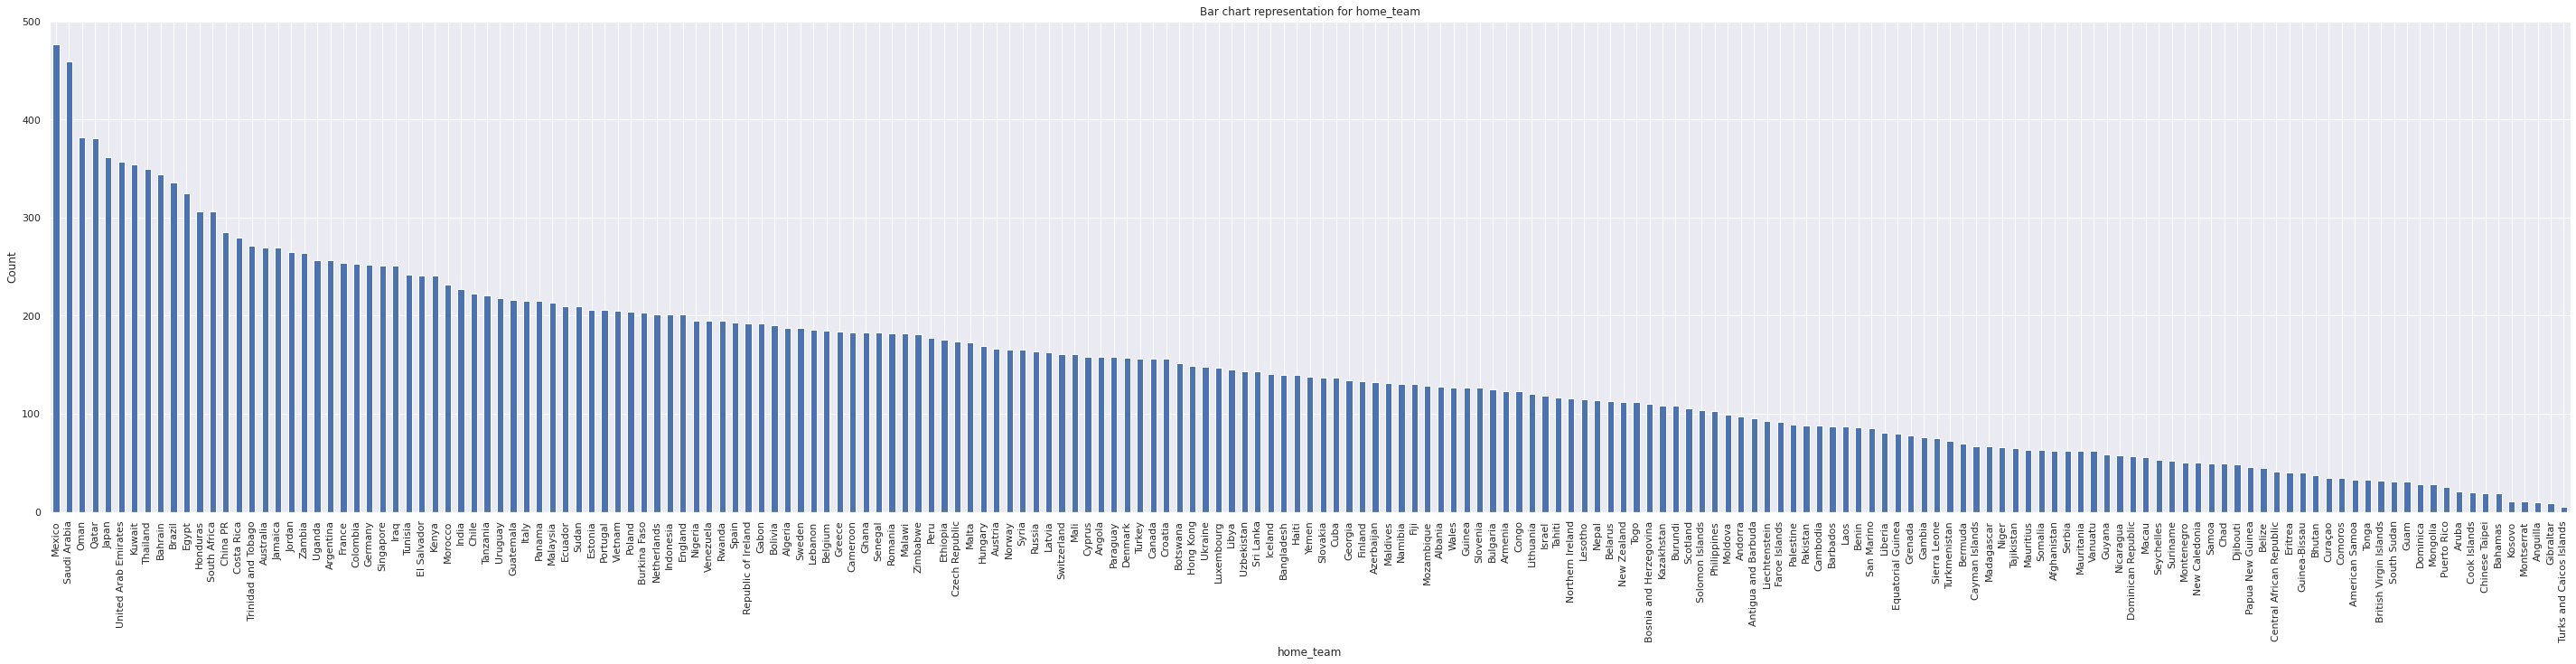

In [ ]:
# Bar chart for home team
plotbar('home_team', (50,10))

Mexico has the highest representation in home teams while Turks and Caicos Islands has the lowest. 

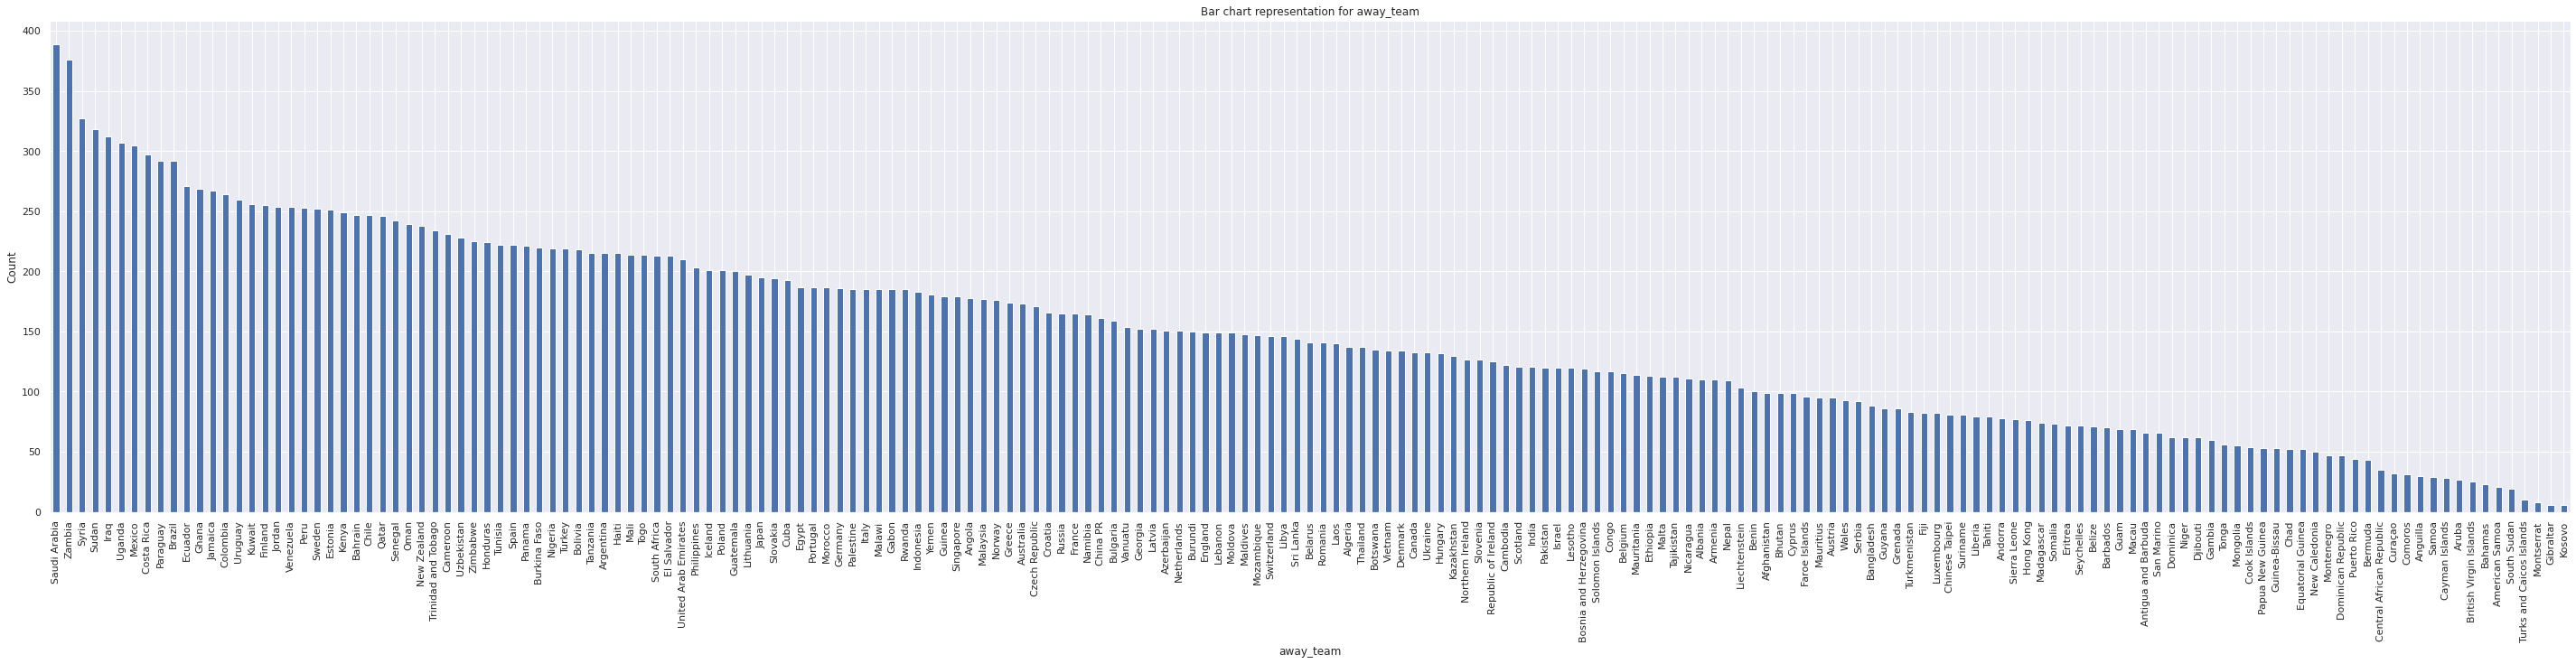

In [ ]:
# Bar chart for away team 
plotbar('away_team', (50,10))

Saudi Arabia has the highest representation while Kosovo has the least.

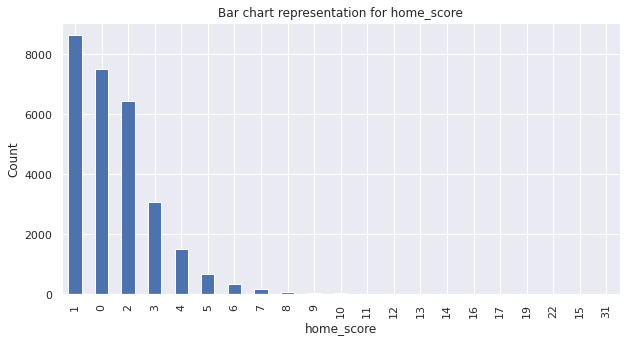

In [ ]:
# Bar chart for home goals
plotbar('home_score', (10,5))

Most teams scored 1 at home.

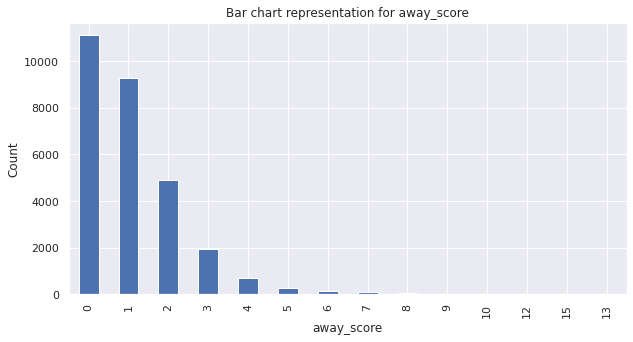

In [ ]:
# Bar chart for away goals
plotbar('away_score', (10,5))

Most teams scored 0 away.

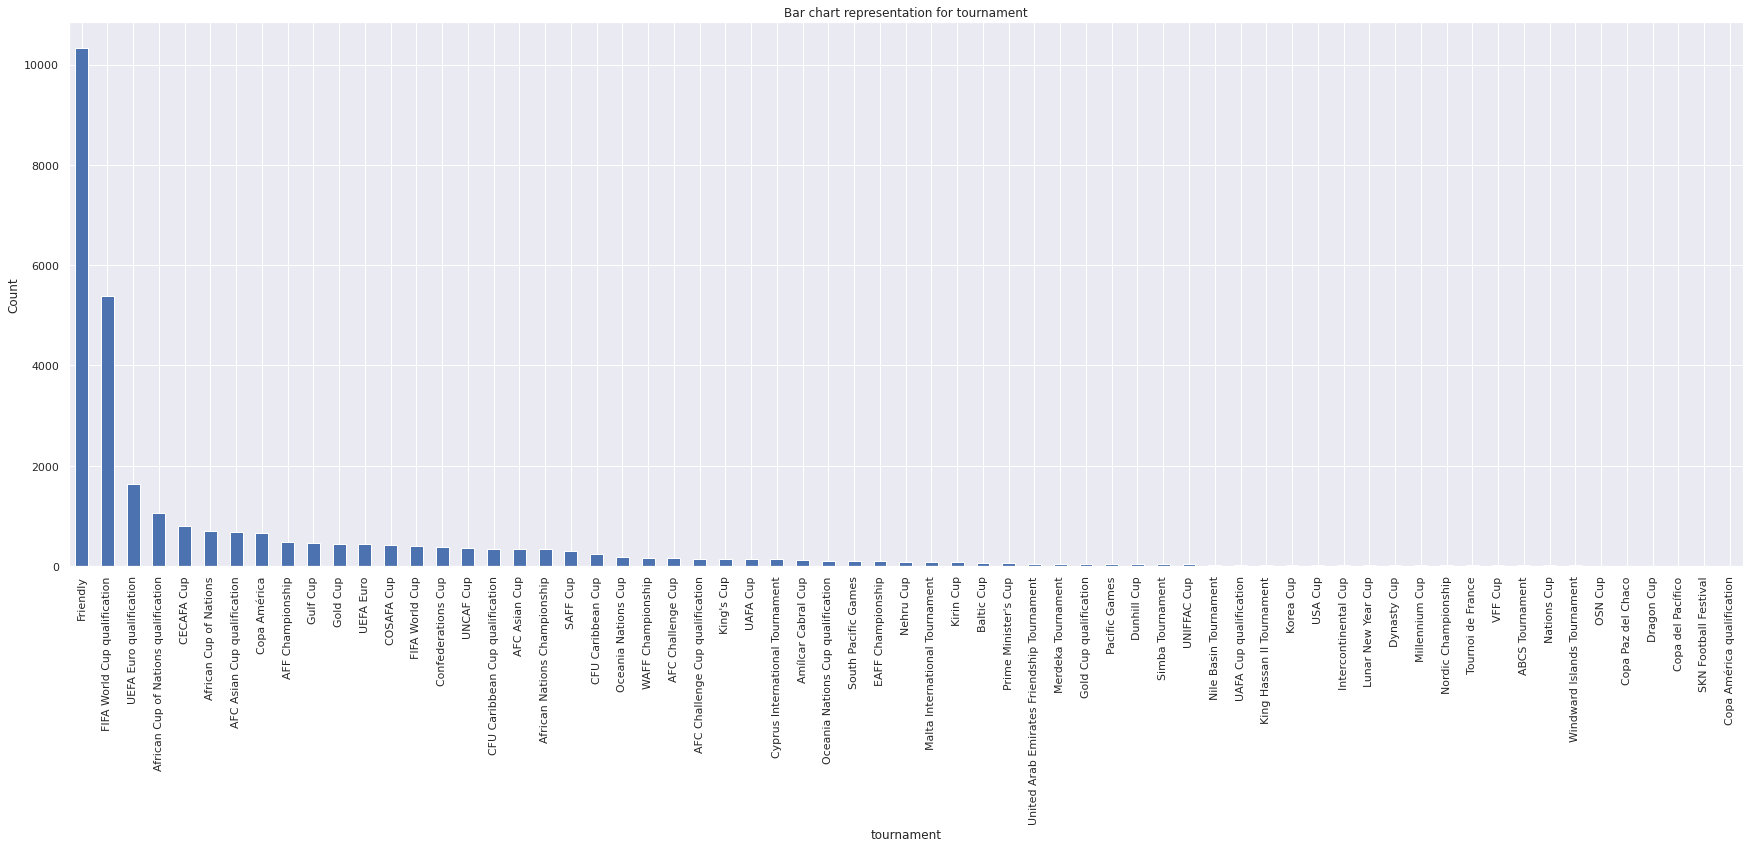

In [ ]:
# Bar chart for tournaments 
plotbar('tournament', (30,10))

Friendlies was the most type of match played and Copa America qualification the least.

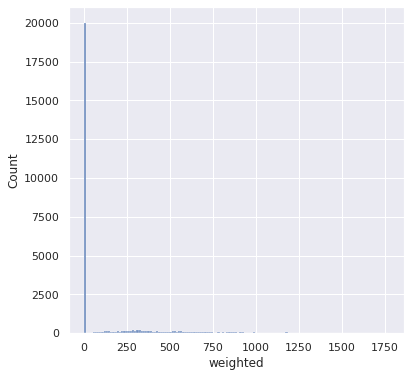

In [ ]:
# Histogram for average weighted points 
sns.histplot(data = df, x = 'weighted')
plt.show()

In [ ]:
# pie chart
def pie(column, explode): 
    df[column].value_counts().plot.pie(autopct='%1.1f%%', explode = explode, shadow=True, startangle=40)
    plt.axis('equal')
    plt.title('Pie chart for {}'.format(column))
    return plt.show()

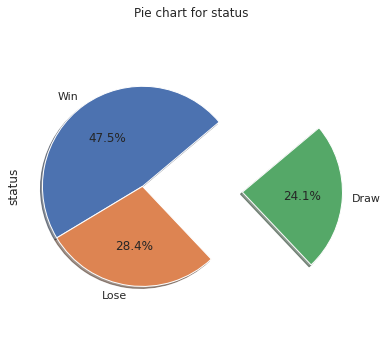

In [ ]:
# pie chart for status(W, L, D)
pie('status', (0,0,1))

There were more wins than either draws or loses for both away and home matches.

###Bivariate

####Numerical - Numerical

In [ ]:
# Scatter plot 
def plotscatter(column1, column2):
  plt.scatter(df[column1], df[column2])
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.title('Scatter plot for {} and {}'.format(column1, column2))
  return plt.show()

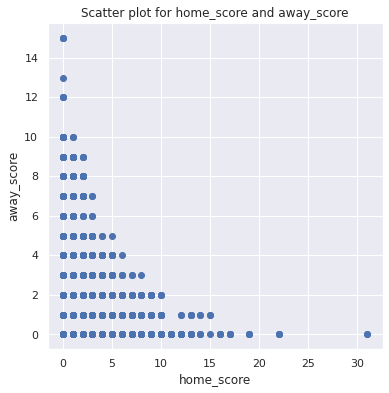

In [ ]:
plotscatter('home_score', 'away_score')

More goals are scored at home compared to away.

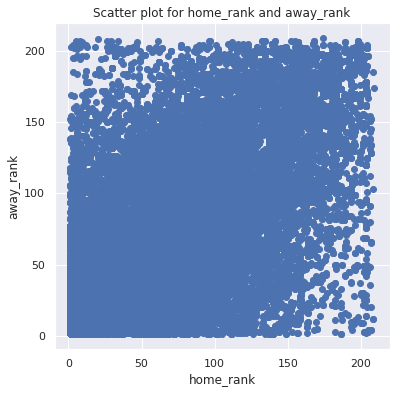

In [ ]:
plotscatter('home_rank', 'away_rank')

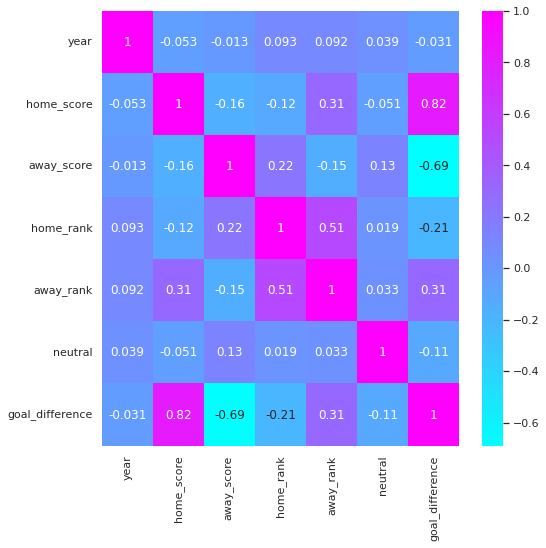

In [ ]:
# correlation heatmap
sns.set(rc={'figure.figsize':(8,8)})
df_plot = sns.heatmap(df.corr(), cmap="cool", annot=True)
plt.show()

####Numerical - Categorical

In [ ]:
# Barchart plot

def barchart(column1, column2, figsize):
    group.plot(x=column1, y=column2, kind='bar', figsize=figsize) 
    plt.title(f'Barchart for {column1} vs {column2}')
    plt.xlabel(column1)
    plt.ylabel(column2)
    return plt.show()

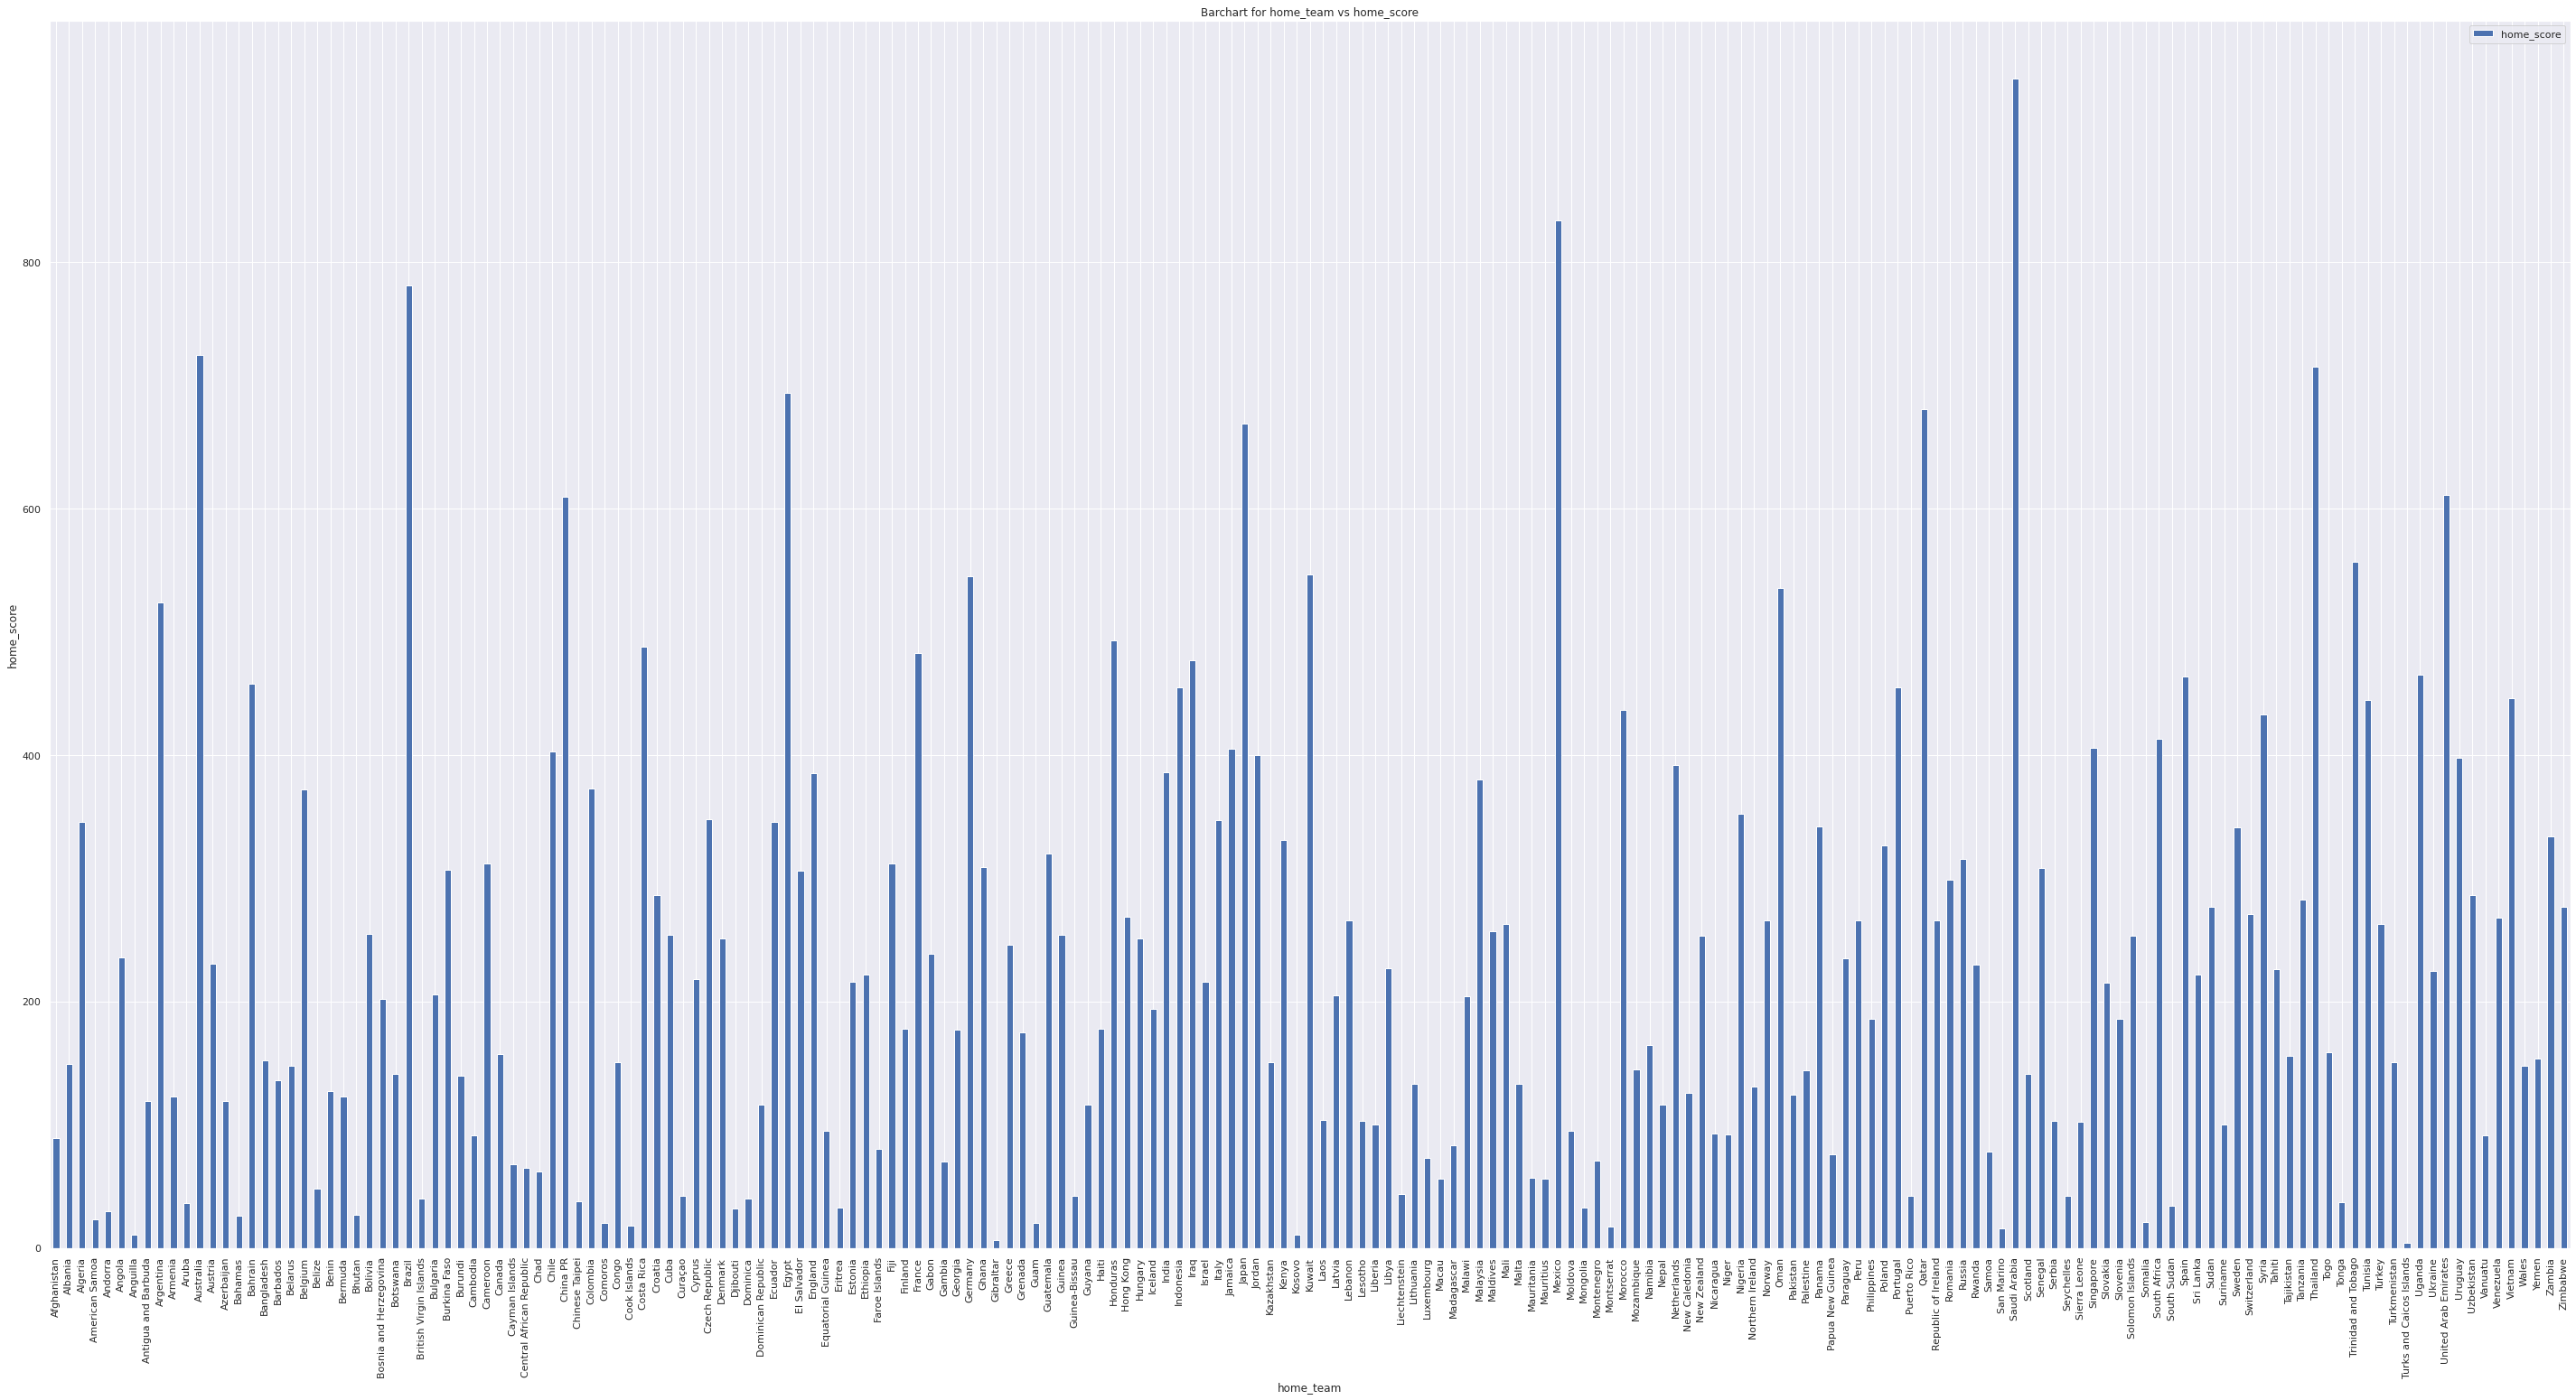

In [ ]:
group = df.groupby('home_team', as_index = False)['home_score'].sum()
barchart('home_team','home_score', (50,25))

Saudi Arabia had the most number of home goals while Turks and Caicos Islands had the least.

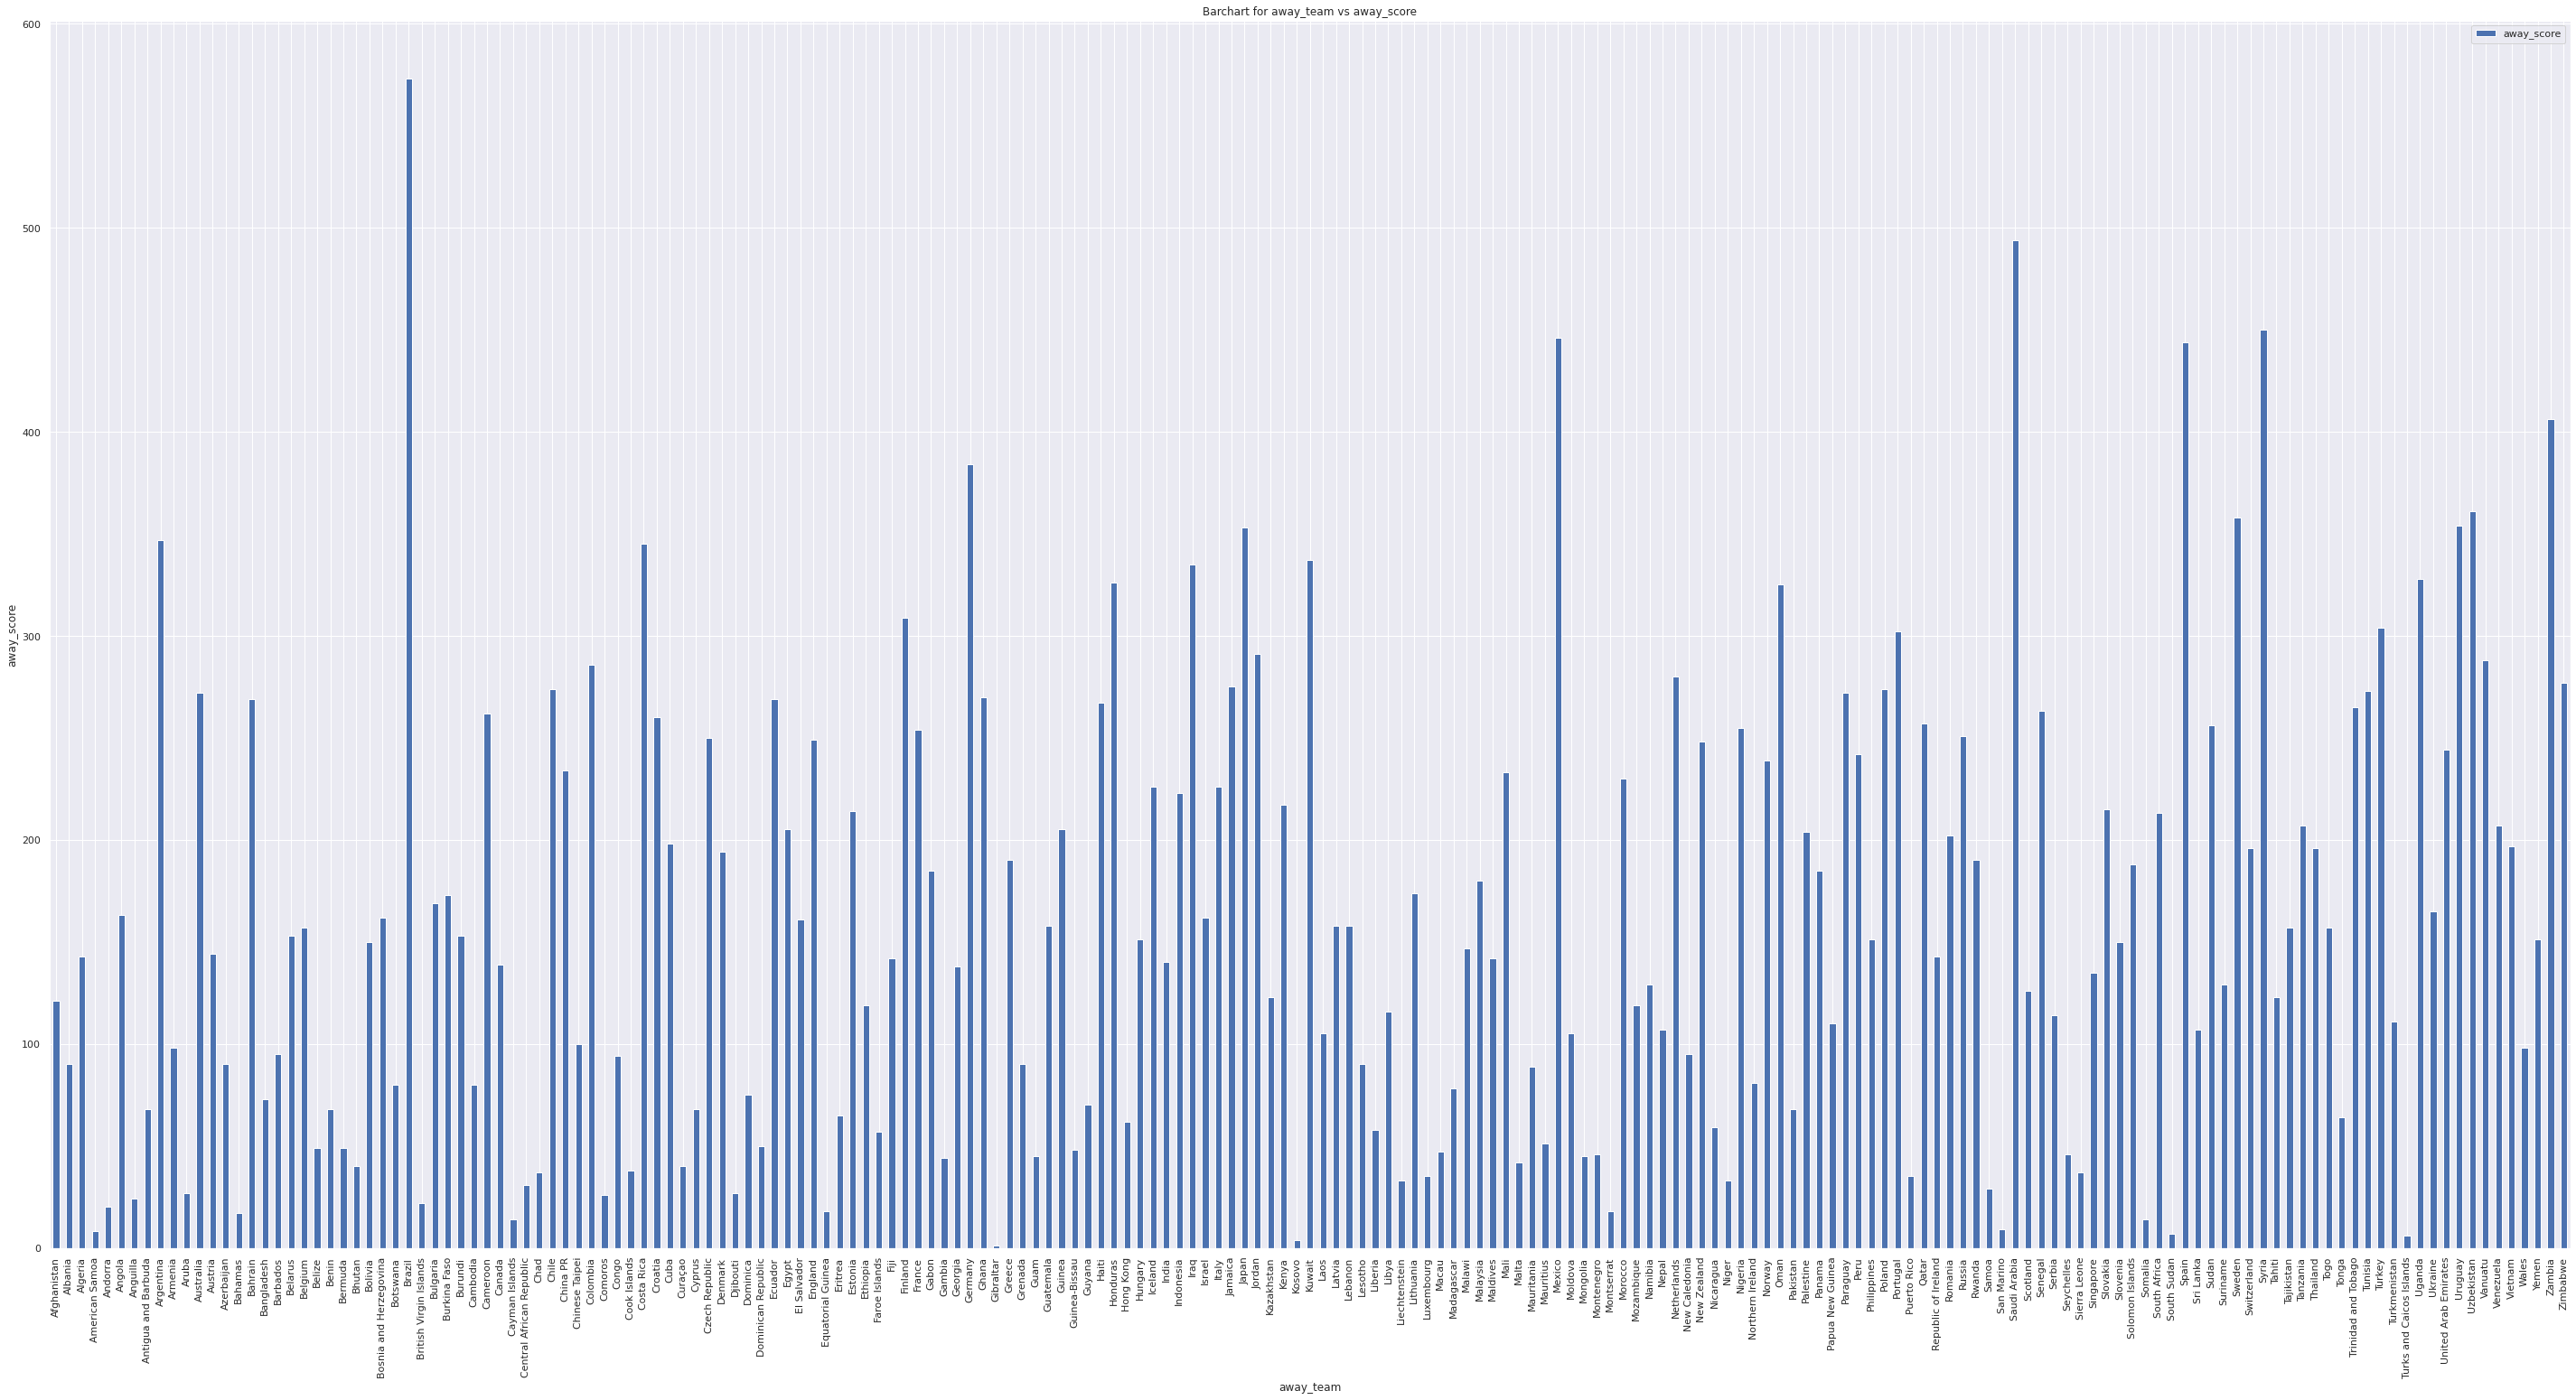

In [ ]:
group = df.groupby('away_team', as_index = False)['away_score'].sum()
barchart('away_team','away_score', (50,25))

Brazil had the highest number of away scores while Kosovo had the least.

##Predictive Analysis

###Label encode the string columns

In [ ]:
# Converting categorical variables to a numerical by label enconding 
le = preprocessing.LabelEncoder()

# create a list of all columns with object data type
obj_list = df.select_dtypes(include = "object").columns
print (obj_list)

# do a for loop to transform the columns to numerical
for feat in obj_list:
    df[feat] = le.fit_transform(df[feat].astype(str))

Index(['home_team', 'away_team', 'tournament', 'status'], dtype='object')


###Splitting the dataset 

In [ ]:
X = df[['away_team', 'home_team', 'away_score', 'home_score', 'away_rank', 'home_rank', 'weighted', 'tournament']]
y = df['status']

# Use 20% of the data as test
# The rest will be our training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

###Multicollinearity

In [ ]:
correlation = X.corr()
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)

,away_team,home_team,away_score,home_score,away_rank,home_rank,weighted,tournament
away_team,1.006676,-0.023084,-0.007554,0.029920,0.015448,-0.045697,0.024127,0.036318
home_team,-0.023084,1.011659,0.008711,0.015486,-0.102849,0.046616,0.028724,0.046801
away_score,-0.007554,0.008711,1.169947,0.003981,0.419000,-0.477538,-0.008218,-0.011484
home_score,0.029920,0.015486,0.003981,1.246019,-0.620640,0.471562,0.036712,0.002013
away_rank,0.015448,-0.102849,0.419000,-0.620640,1.840012,-1.110930,-0.032977,0.082770
home_rank,-0.045697,0.046616,-0.477538,0.471562,-1.110930,1.846952,0.352105,0.074747
weighted,0.024127,0.028724,-0.008218,0.036712,-0.032977,0.352105,1.100963,0.016209
tournament,0.036318,0.046801,-0.011484,0.002013,0.082770,0.074747,0.016209,1.022254


No independent variable is collinear to the other.

###Modelling - Polynomial regression

In [ ]:
# Standardising the X_train and the X_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
model= LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating the RMSE 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

# Accuracy
r2_score = model.score(X_test,y_test)
print('Score: ', r2_score*100,'%')

Root Mean Squared Error: 0.679692515720357
Score:  29.418605697617284 %


###Cross-Validation of the polynomial regression 

In [ ]:
# Creating a parameters dictionary
#
params = {'fit_intercept': [True, False]}

# Creating a cross validation of 5 folds
#
kfold = KFold(n_splits = 5)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator = model, param_grid = params, cv = kfold)

# Fitting the grid search 
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
print(f'Best score is {grid_search.best_score_}')

Best score is 0.2834481091456472


In [ ]:
from sklearn.model_selection import LeaveOneOut

# Specifying the x and y variables 
X = df[['away_team', 'home_team', 'away_score', 'home_score', 'away_rank', 'home_rank', 'tournament', 'weighted']].values
y = df['status'].values

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help to count the number of folds and models trained
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
print('mean of RMSES is ', np.mean(RMSES))

we are using 28518 folds
trained 28518 models
mean of RMSES is  0.5674686348700743


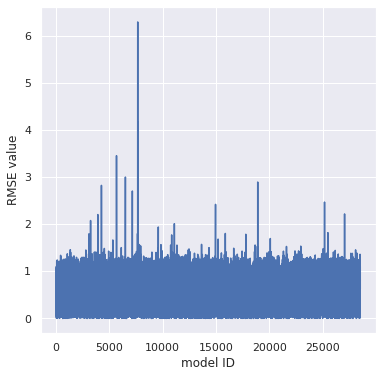

In [ ]:
# plotting the RMSES
plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

###Heteroscedasticity

In [ ]:
# Residuals have been calculated by by substracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)
pd.DataFrame(residuals).describe()


,0
count,1.000000
mean,-0.629026
std,NaN
min,-0.629026
25%,-0.629026
50%,-0.629026
75%,-0.629026
max,-0.629026


In [ ]:
# Performing the barlett's test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

nan
the variances are homogeneous!


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


###Logistic Regression

In [ ]:
# x and y variables
X = df[['away_team', 'home_team', 'away_score', 'home_score', 'away_rank', 'home_rank', 'weighted', 'tournament']]
y = df['status']

# Use 20% of the data as test
# The rest will be our training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


# fitting the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2500)
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

# evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', cm)

# Accuracy
r2_score = model.score(X_test,y_test)
print('Score: ', r2_score*100,'%')

pd.DataFrame(cm, index=['Lose','Draw', 'Win'],
columns=['predicted_Lose', 'predicted_Draw', 'predicted_Win'])

Confusion matrix: 
 [[1356    0    0]
 [   0 1659    0]
 [   0    0 2689]]
Score:  100.0 %


,predicted_Lose,predicted_Draw,predicted_Win
Lose,1356,0,0
Draw,0,1659,0
Win,0,0,2689


In [ ]:
# Creating the logistic regression
logistic = linear_model.LogisticRegression(max_iter=2500, solver='liblinear')
logistic

# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fitting grid search
best_model = clf.fit(X, y)

# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Predicting target vector
pd.DataFrame(best_model.predict(X))

Best Penalty: l1
Best C: 1.0


,0
0,0
1,0
2,0
3,0
4,2
...,...
28513,1
28514,0
28515,0
28516,2
